# In this notebook there will be trained model to predict Car Price


In [ ]:
# Import necessary libs
import kagglehub
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Download dataset
path = kagglehub.dataset_download("hellbuoy/car-price-prediction")

dataset = pd.read_csv(f'{path}/CarPrice_Assignment.csv')

100%|██████████| 18.1k/18.1k [00:00<00:00, 22.8MB/s]

Extracting files...


## Introducing with the dataset


In [ ]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Visualization part


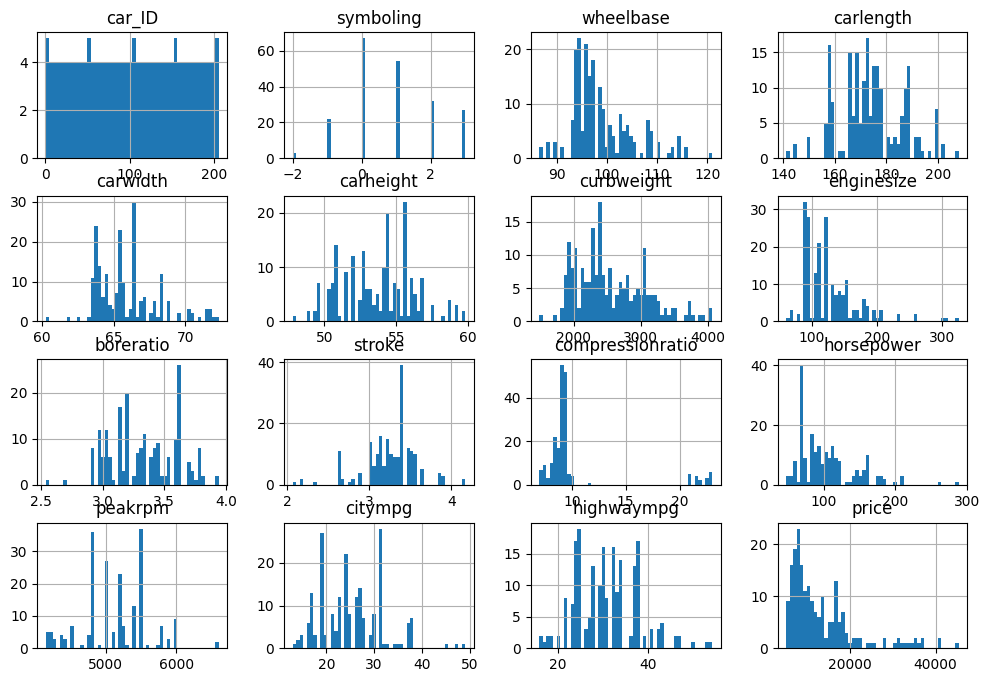

In [ ]:
# Histogram
dataset.hist(bins=50, figsize=(12, 8))
plt.show()

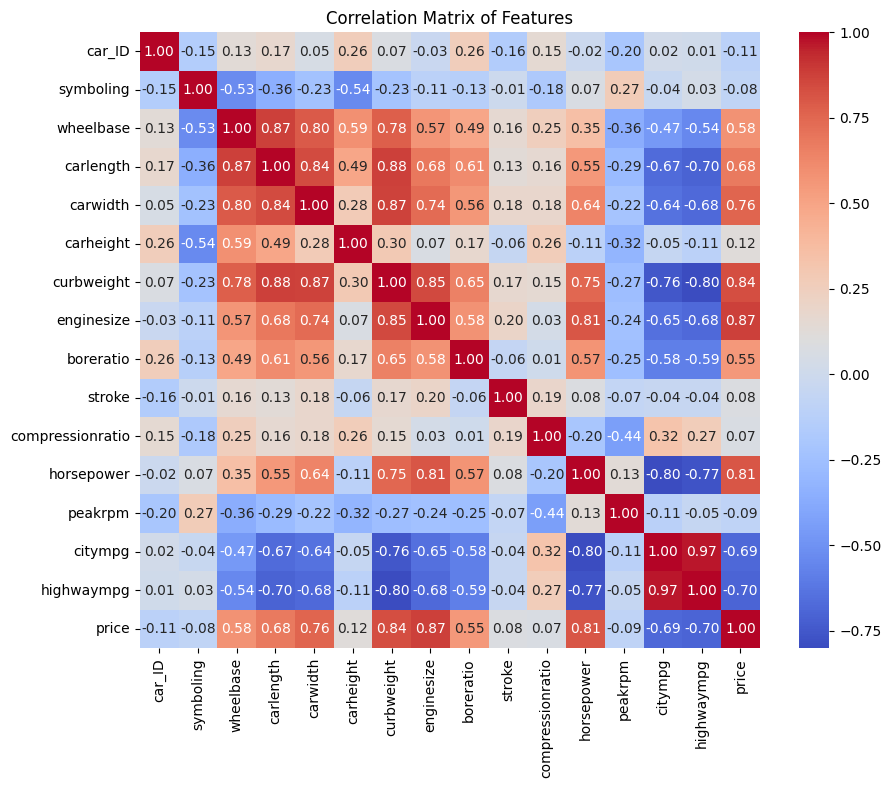

In [ ]:
# Correlation matrix
corr = dataset[dataset.select_dtypes(include=['number']).columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

## Preprocessing Steps

In [ ]:
dataset.drop(columns=['car_ID'], inplace=True)

In [ ]:
dataset.drop(columns=['CarName'], inplace=True)

In [ ]:
dataset.fueltype.value_counts()

,count
fueltype,
gas,185
diesel,20


In [ ]:
dataset.aspiration.value_counts()

,count
aspiration,
std,168
turbo,37


In [ ]:
dataset.doornumber.value_counts()

,count
doornumber,
four,115
two,90


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [ ]:
# Firstly need to split the dataset to target and other ones

X = dataset.drop(columns=['price'])
y = dataset['price']

In [ ]:
# Then need to define the cat and num cols and divide them

categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

In [ ]:
# Split dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
set_config(display='diagram') # to visualize the pipeline

In [ ]:
num_trans = Pipeline([("scaler", StandardScaler())])
cat_trans = Pipeline([("onehot", OneHotEncoder(handle_unknown="ignore"))])

In [ ]:
preprocessor = ColumnTransformer([
    ("num", num_trans, numerical_cols),
    ("cat", cat_trans, categorical_cols)
])

In [ ]:
pip = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", SGDRegressor(max_iter=2000, tol=1e-5, penalty=None, n_iter_no_change=100, random_state=42))
])

In [ ]:
del pip.named_steps['preprocessor']
del pip.named_steps['regressor']
del pip

In [ ]:
pip.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object'))])),
                ('regressor',
                 SGDRegressor(max_iter=2000, n_iter_no_change=100, penalty=None,
                              random_state=42, tol=1e-05))])

In [ ]:
y_pred = pip.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 10281136.66
Root Mean Squared Error: 3206.42
R-squared Score: 0.87


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "regressor__alpha": [0.00001, 0.0001, 0.001, 0.01],
    "regressor__penalty": ["l2", "l1", "elasticnet"],
    "regressor__learning_rate": ["constant", "invscaling", "adaptive"],
    "regressor__eta0": [0.0001, 0.001, 0.01, 0.1],
}

grid_search = GridSearchCV(pip, param_grid, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'regressor__alpha': 0.001, 'regressor__eta0': 0.1, 'regressor__learning_rate': 'invscaling', 'regressor__penalty': 'elasticnet'}


In [ ]:
pip2 = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", SGDRegressor(max_iter=1000, tol=1e-3, penalty='elasticnet', alpha=0.001, eta0=0.1, learning_rate='invscaling', random_state=42))
])

In [ ]:
pip2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object'))])),
                ('regressor',
                 SGDRegressor(alpha=0.001, eta0=0.1, penalty='elasticnet',
                              random_state=42))])

In [ ]:
y_pred = pip2.predict(X_test)

In [ ]:
mse_2 = mean_squared_error(y_test, y_pred)
rmse_2 = root_mean_squared_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_2:.2f}")
print(f"Root Mean Squared Error: {rmse_2:.2f}")
print(f"R-squared Score: {r2_2:.2f}")

Mean Squared Error: 10729725.48
Root Mean Squared Error: 3275.63
R-squared Score: 0.86
